In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

draft_df = pd.read_csv("nfl_survival_analysis_data.csv")

# set some plotting aesthetics, similar to ggplot
sns.set(palette = "colorblind", font_scale = 1.35, 
        rc = {"figure.figsize": (12,9), "axes.facecolor": ".92"})

In [2]:
draft_df.head()

,Draft_Yr,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,...,Rec,Rec_Yds,Rec_TD,Tkl,Def_Int,Sk,College,Player_ID,Retired,Duration
0,1967,1,1,BAL,Bubba Smith,DE,22.0,1976.0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,Michigan St.,SmitBu00,1,10.0
1,1967,1,2,MIN,Clint Jones,RB,22.0,1973.0,0,0,...,38.0,431.0,0.0,0.0,0.0,0.0,Michigan St.,JoneCl00,1,7.0
2,1967,1,3,SFO,Steve Spurrier,QB,22.0,1976.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Florida,SpurSt00,1,10.0
3,1967,1,4,MIA,Bob Griese,QB,22.0,1980.0,2,8,...,0.0,0.0,0.0,0.0,0.0,0.0,Purdue,GrieBo00,1,14.0
4,1967,1,5,HOU,George Webster,LB,21.0,1976.0,3,3,...,0.0,0.0,0.0,0.0,5.0,0.0,Michigan St.,WebsGe00,1,10.0


In [3]:
# Clean the data to be filled
draft_df = draft_df.fillna(0)
draft_df.head()

,Draft_Yr,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,...,Rec,Rec_Yds,Rec_TD,Tkl,Def_Int,Sk,College,Player_ID,Retired,Duration
0,1967,1,1,BAL,Bubba Smith,DE,22.0,1976.0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,Michigan St.,SmitBu00,1,10.0
1,1967,1,2,MIN,Clint Jones,RB,22.0,1973.0,0,0,...,38.0,431.0,0.0,0.0,0.0,0.0,Michigan St.,JoneCl00,1,7.0
2,1967,1,3,SFO,Steve Spurrier,QB,22.0,1976.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Florida,SpurSt00,1,10.0
3,1967,1,4,MIA,Bob Griese,QB,22.0,1980.0,2,8,...,0.0,0.0,0.0,0.0,0.0,0.0,Purdue,GrieBo00,1,14.0
4,1967,1,5,HOU,George Webster,LB,21.0,1976.0,3,3,...,0.0,0.0,0.0,0.0,5.0,0.0,Michigan St.,WebsGe00,1,10.0


In [4]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter() 

In [5]:
kmf.fit(durations = draft_df.Duration, 
        event_observed = draft_df.Retired)

<lifelines.KaplanMeierFitter: fitted with 15592 observations, 1112 censored>

In [6]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,4597,4542,55,15592,15592
1.0,1310,1108,202,0,10995
2.0,1415,1221,194,0,9685
3.0,1183,1019,164,0,8270
4.0,1126,994,132,0,7087
5.0,967,865,102,0,5961
6.0,915,835,80,0,4994
7.0,823,765,58,0,4079
8.0,743,709,34,0,3256


In [9]:
events_at_0 = kmf.event_table.ilocevent_at_1 = kmf.event_table.iloc[1, :]
surv_for_1 =  (event_at_1.at_risk - event_at_1.observed) / event_at_1.at_risk
surv_for_1[0, :]
surv_for_0 = (events_at_0.at_risk - events_at_0.observed) / events_at_0.at_risk
surv_for_0

0.70869676757311439

In [10]:
event_at_1 = kmf.event_table.iloc[1, :]
surv_for_1 =  (event_at_1.at_risk - event_at_1.observed) / event_at_1.at_risk
surv_for_1

0.89922692132787629

In [11]:
event_at_2 = kmf.event_table.iloc[2, :]
surv_for_2 =  (event_at_2.at_risk - event_at_2.observed) / event_at_2.at_risk
surv_for_2

0.87392875580795049

In [12]:
surv_after_2 = surv_for_0 * surv_for_1 * surv_for_2
surv_after_2

0.55693662924725407

In [13]:
kmf.predict(2)

0.55693662924725473

In [14]:
# The survival probabilities of NFL players after 1, 3, 5, and 10 yrs played
kmf.predict([1,3,5,10])

1     0.637279
3     0.488313
5     0.358903
10    0.099400
Name: KM_estimate, dtype: float64

In [15]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.708697
1.0,0.637279
2.0,0.556937
3.0,0.488313
4.0,0.419824
5.0,0.358903
6.0,0.298894
7.0,0.242838
8.0,0.189959


In [16]:
kmf.median_

3.0

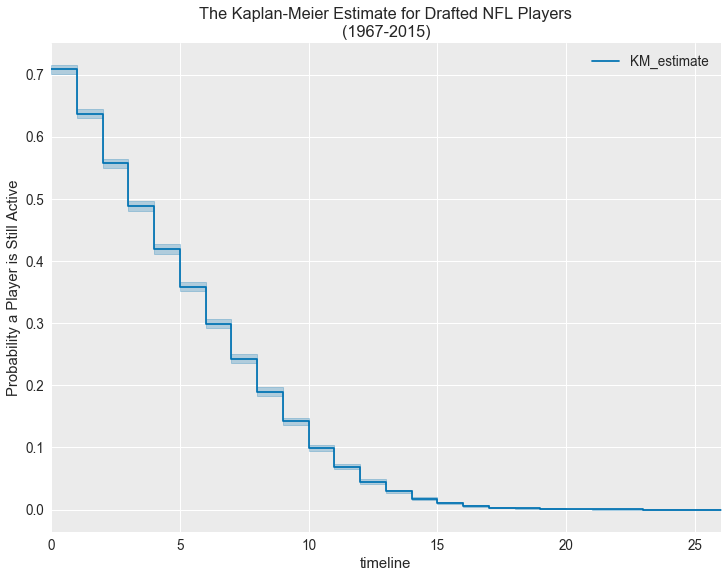

In [17]:
# plot the KM estimate
kmf.plot()
# Add title and y-axis label
plt.title("The Kaplan-Meier Estimate for Drafted NFL Players\n(1967-2015)")
plt.ylabel("Probability a Player is Still Active")

plt.show()

Reference for this notebook is below.
http://savvastjortjoglou.com/nfl-survival-analysis-kaplan-meier.html